# CoVID19 Findings

This file is part of a University Project on Data Mining and Machine Learning.
Brought to you by Ioannis Loudaros and Christina Kratimenou,students in the University of Patras.
For more information read the report of the Project [here](https://github.com/iloudaros/Data-Mining-and-Machine-Learning-Project)

## 1. Early Findings about the dataset

In [19]:
# Packages that are used in this file
import pandas as pd

import seaborn as sns
from yellowbrick.cluster import KElbowVisualizer

import numpy as np
from math import isnan
from matplotlib import pyplot as plt

from sklearn.preprocessing import  LabelEncoder
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import silhouette_score
from sklearn import svm
from sklearn.metrics import mean_squared_error
from sklearn.preprocessing import MinMaxScaler

from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, SimpleRNN

#Importing the dataset
dataset_file = "given/data.csv"
dataset = pd.read_csv(dataset_file)

#Exploring the dataset
dataset.info()
dataset.describe()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 38472 entries, 0 to 38471
Data columns (total 15 columns):
 #   Column                           Non-Null Count  Dtype  
---  ------                           --------------  -----  
 0   Entity                           38472 non-null  object 
 1   Continent                        38472 non-null  object 
 2   Latitude                         38472 non-null  float64
 3   Longitude                        38472 non-null  float64
 4   Average temperature per year     38472 non-null  int64  
 5   Hospital beds per 1000 people    38472 non-null  float64
 6   Medical doctors per 1000 people  38472 non-null  float64
 7   GDP/Capita                       38472 non-null  float64
 8   Population                       38472 non-null  int64  
 9   Median age                       38472 non-null  int64  
 10  Population aged 65 and over (%)  38472 non-null  int64  
 11  Date                             38472 non-null  object 
 12  Daily tests       

,Latitude,Longitude,Average temperature per year,Hospital beds per 1000 people,Medical doctors per 1000 people,GDP/Capita,Population,Median age,Population aged 65 and over (%),Daily tests,Cases,Deaths
count,38472.000000,38472.000000,38472.000000,38472.000000,38472.000000,38472.000000,3.847200e+04,38472.000000,38472.000000,3.057700e+04,3.821800e+04,34862.000000
mean,23.737060,20.210847,17.717145,3.165305,2.086313,19002.331415,4.896983e+07,32.751508,10.663392,3.944059e+04,2.879027e+05,8090.504733
std,26.060413,61.074922,8.134926,2.561767,1.518252,22271.107786,1.427251e+08,8.472305,6.770417,1.501847e+05,1.405243e+06,29548.753221
min,-40.900000,-106.350000,-2.000000,0.200000,0.020000,411.600000,3.412840e+05,16.000000,1.000000,-2.391720e+05,1.000000e+00,1.000000
25%,8.620000,-3.440000,11.000000,1.400000,0.820000,3659.000000,4.793900e+06,27.000000,5.000000,1.505000e+03,2.074000e+03,77.000000
50%,27.510000,21.820000,20.000000,2.500000,1.890000,8821.800000,1.148464e+07,32.000000,8.000000,5.520000e+03,2.143100e+04,527.000000
75%,45.940000,47.480000,25.000000,4.490000,3.210000,25946.200000,4.286296e+07,41.000000,16.000000,2.038200e+04,1.373770e+05,3480.500000
max,64.960000,179.410000,29.000000,13.050000,7.520000,114704.600000,1.339180e+09,48.000000,28.000000,2.945871e+06,2.860567e+07,513091.000000


In [20]:
dataset #alternatively : print(dataset.head())

,Entity,Continent,Latitude,Longitude,Average temperature per year,Hospital beds per 1000 people,Medical doctors per 1000 people,GDP/Capita,Population,Median age,Population aged 65 and over (%),Date,Daily tests,Cases,Deaths
0,Albania,Europe,41.15,20.17,14,2.89,1.29,5353.2,2873457,38,14,2020-02-25,8.0,NaN,NaN
1,Albania,Europe,41.15,20.17,14,2.89,1.29,5353.2,2873457,38,14,2020-02-26,5.0,NaN,NaN
2,Albania,Europe,41.15,20.17,14,2.89,1.29,5353.2,2873457,38,14,2020-02-27,4.0,NaN,NaN
3,Albania,Europe,41.15,20.17,14,2.89,1.29,5353.2,2873457,38,14,2020-02-28,1.0,NaN,NaN
4,Albania,Europe,41.15,20.17,14,2.89,1.29,5353.2,2873457,38,14,2020-02-29,8.0,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
38467,Zimbabwe,Africa,-19.02,29.15,20,1.70,0.08,1464.0,16529904,19,3,2021-02-24,1804.0,35960.0,1456.0
38468,Zimbabwe,Africa,-19.02,29.15,20,1.70,0.08,1464.0,16529904,19,3,2021-02-25,2965.0,35994.0,1458.0
38469,Zimbabwe,Africa,-19.02,29.15,20,1.70,0.08,1464.0,16529904,19,3,2021-02-26,NaN,36044.0,1463.0
38470,Zimbabwe,Africa,-19.02,29.15,20,1.70,0.08,1464.0,16529904,19,3,2021-02-27,NaN,36058.0,1463.0


### Data Preproccessing


#### A. Missing Values:

1. Numerical data: "Daily tests", "Cases", "Deaths" have some NaNs (We list how many, below) -> we 'll use linear interpolation (different for each country).

    The reason behind this decision is the assumption that the number of these attributes doesn't change dramatically between consecutive days.
    
2. Categorical data: We don't have any missing categorical data.

In [21]:
#Finding the number of missing values in each column
NaNs_data_dataset =  dataset.isnull().sum().sort_values(ascending=False)
print(NaNs_data_dataset)

Daily tests                        7895
Deaths                             3610
Cases                               254
Entity                                0
Continent                             0
Latitude                              0
Longitude                             0
Average temperature per year          0
Hospital beds per 1000 people         0
Medical doctors per 1000 people       0
GDP/Capita                            0
Population                            0
Median age                            0
Population aged 65 and over (%)       0
Date                                  0
dtype: int64


In [22]:
# Fill the missing "Daily tests", "Cases" and "Deaths" values with interpolation, only using data from the same country.
for country in dataset["Entity"].unique():
    dataset[dataset["Entity"] == country] = dataset[dataset["Entity"] == country].interpolate()

# There is still a chance of border values missing, so we will fill them with zeros (note that these missing values are only in the beginning so our assumption is not illogical).
dataset = dataset.fillna(0)

# Round only the new values to integers
dataset["Daily tests"] = dataset["Daily tests"].round(0).astype(int)
dataset["Cases"] = dataset["Cases"].round(0).astype(int)
dataset["Deaths"] = dataset["Deaths"].round(0).astype(int)


# Making sure that we did not add any negative values 
# (This is not needed since we are using linear interpolation, but we will keep it for now in case we change the interpolation method in the future)
# nonegatives = dataset["Daily tests"]
# nonegatives[nonegatives < 0] = 0
# dataset["Daily tests"] = nonegatives

# nonegatives = dataset["Cases"]
# nonegatives[nonegatives < 0] = 0
# dataset["Cases"] = nonegatives

# nonegatives = dataset["Deaths"]
# nonegatives[nonegatives < 0] = 0
# dataset["Deaths"] = nonegatives


# Making sure that there are no missing values left 
NaNs_data_dataset =  dataset.isnull().sum().sort_values(ascending=False)
print(NaNs_data_dataset)
dataset

# Saving the proccesed dataset
dataset.to_csv("exports/data_proccesed.csv", index=False)

Entity                             0
Continent                          0
Latitude                           0
Longitude                          0
Average temperature per year       0
Hospital beds per 1000 people      0
Medical doctors per 1000 people    0
GDP/Capita                         0
Population                         0
Median age                         0
Population aged 65 and over (%)    0
Date                               0
Daily tests                        0
Cases                              0
Deaths                             0
dtype: int64


#### B. Data Transformation

We have no need to transform the data of our dataset.

### Correlations
Let's explore the correlations existing in the data to draw some conclusions about which attributes interest us.


#### Correlation Heatmap

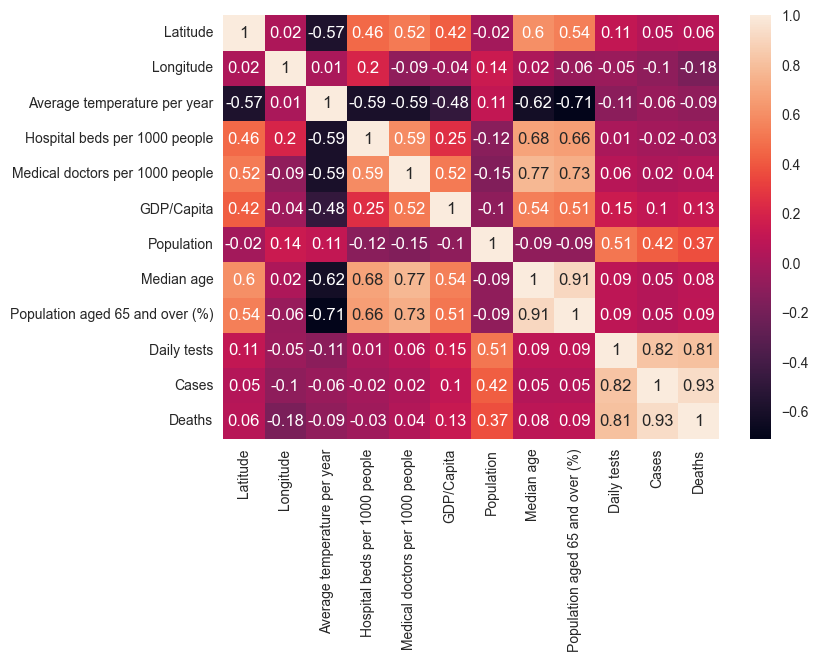

In [23]:
#Calculating the correlation matrix
to_correlate = dataset.drop(['Entity','Continent','Date'], axis=1)
corr_matrix = to_correlate.corr()

#Plotting the correlation matrix
sns.heatmap(corr_matrix.round(decimals=2),annot=True)
plt.show()

#### Graphical Correlations

##### Total Deaths and Total Cases (normalzsed by population)

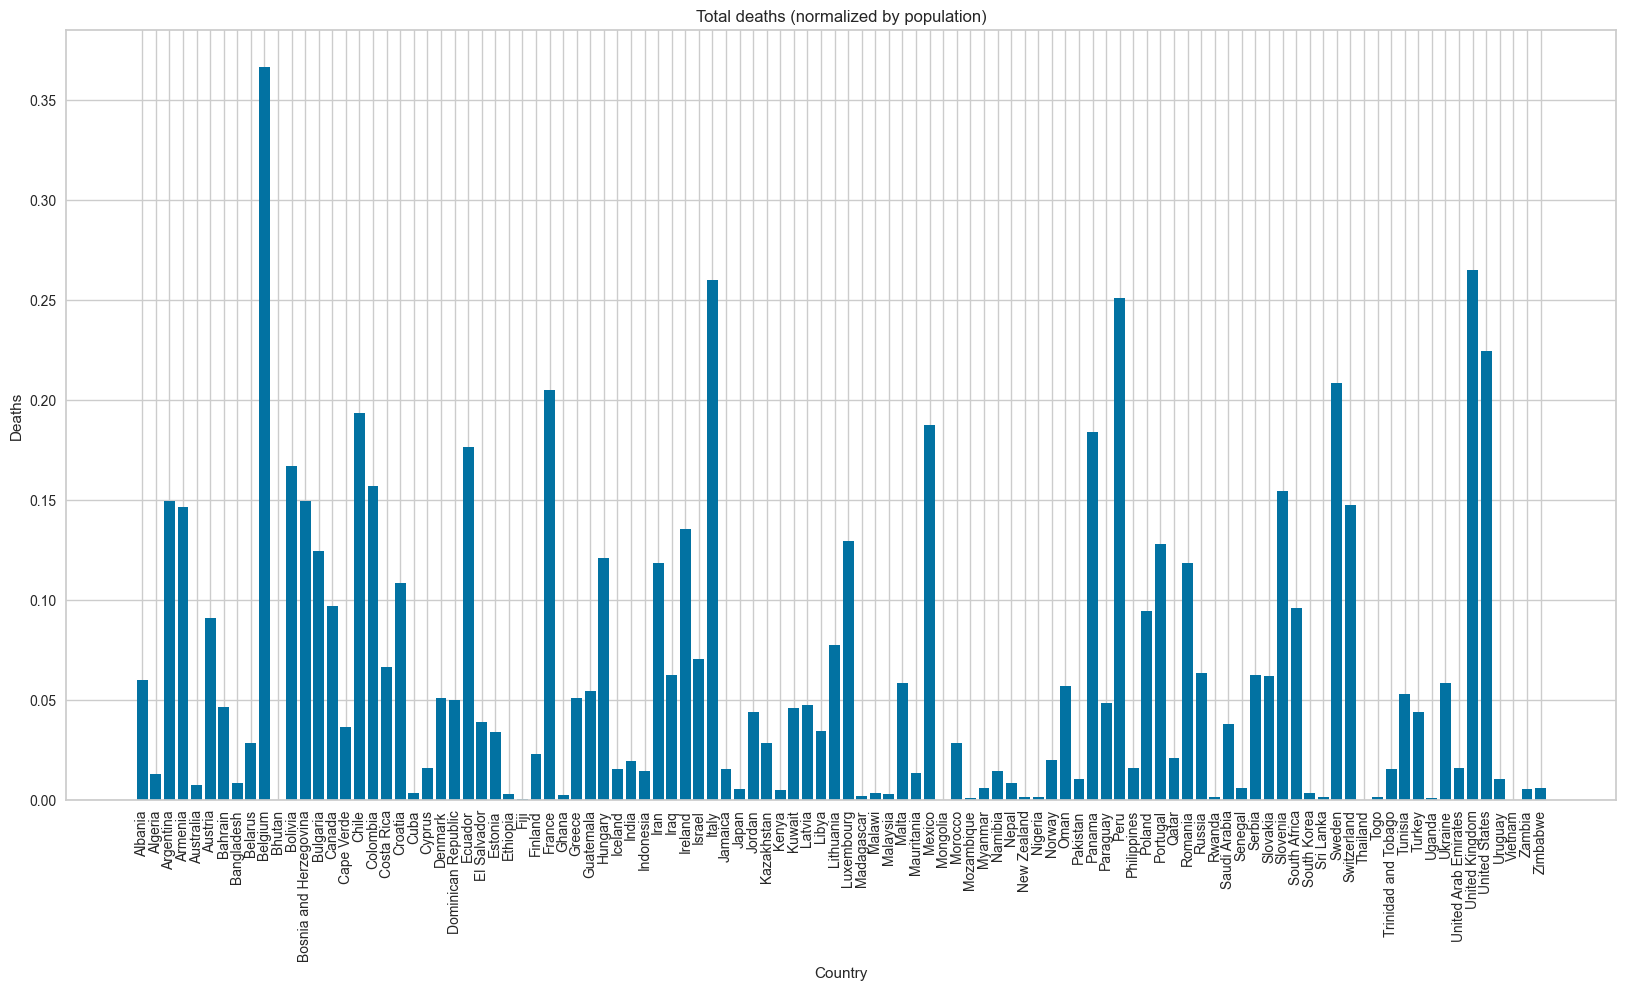

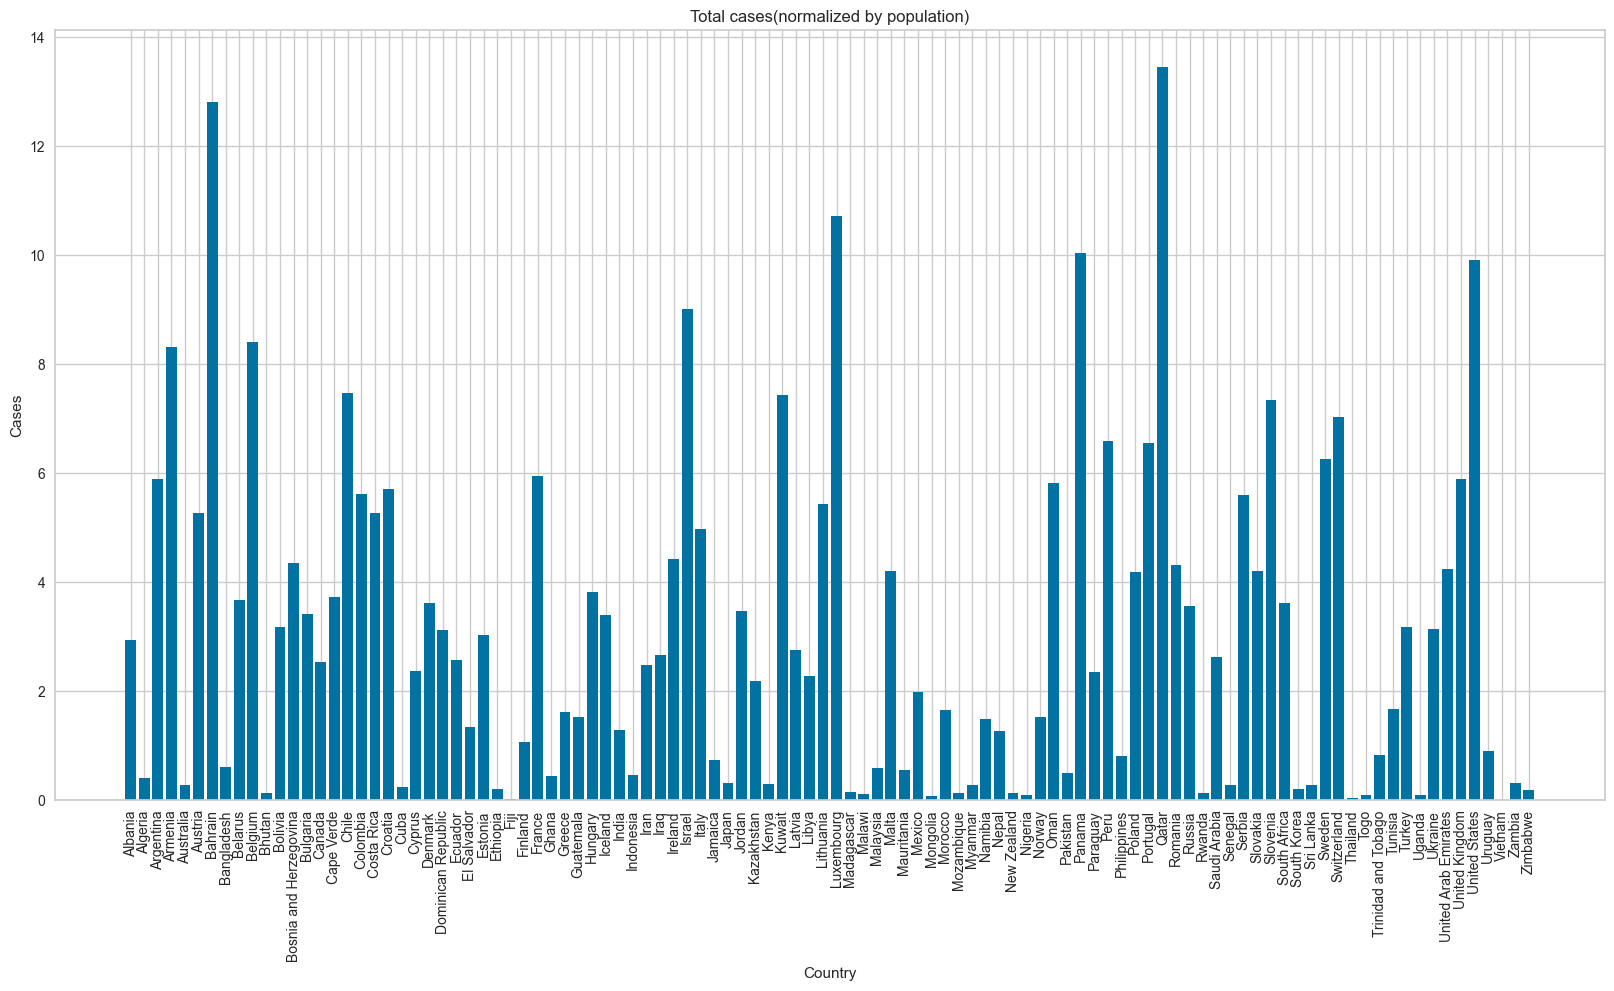

In [24]:
# Group data by country and calculate the total number of deaths and cases for each
total_deaths_by_country = dataset.groupby('Entity')['Deaths'].sum()
total_cases_by_country = dataset.groupby('Entity')['Cases'].sum()

# Normalize the data by dividing the total number of deaths and cases by the population of each country
total_deaths_by_country = total_deaths_by_country / dataset.groupby('Entity')['Population'].mean()
total_cases_by_country = total_cases_by_country / dataset.groupby('Entity')['Population'].mean()

 

# Plot the total number of deaths and cases for each country normalized by the population of each country
plt.figure(figsize=(20,10))
plt.title('Total deaths (normalized by population)')
plt.ylabel('Deaths')
plt.xlabel('Country')
plt.xticks(rotation=90)
plt.bar(total_deaths_by_country.index, total_deaths_by_country.values)
plt.figure(figsize=(20,10))
plt.title('Total cases(normalized by population)')
plt.ylabel('Cases')
plt.xlabel('Country')
plt.xticks(rotation=90)
plt.bar(total_cases_by_country.index, total_cases_by_country.values)
plt.show()

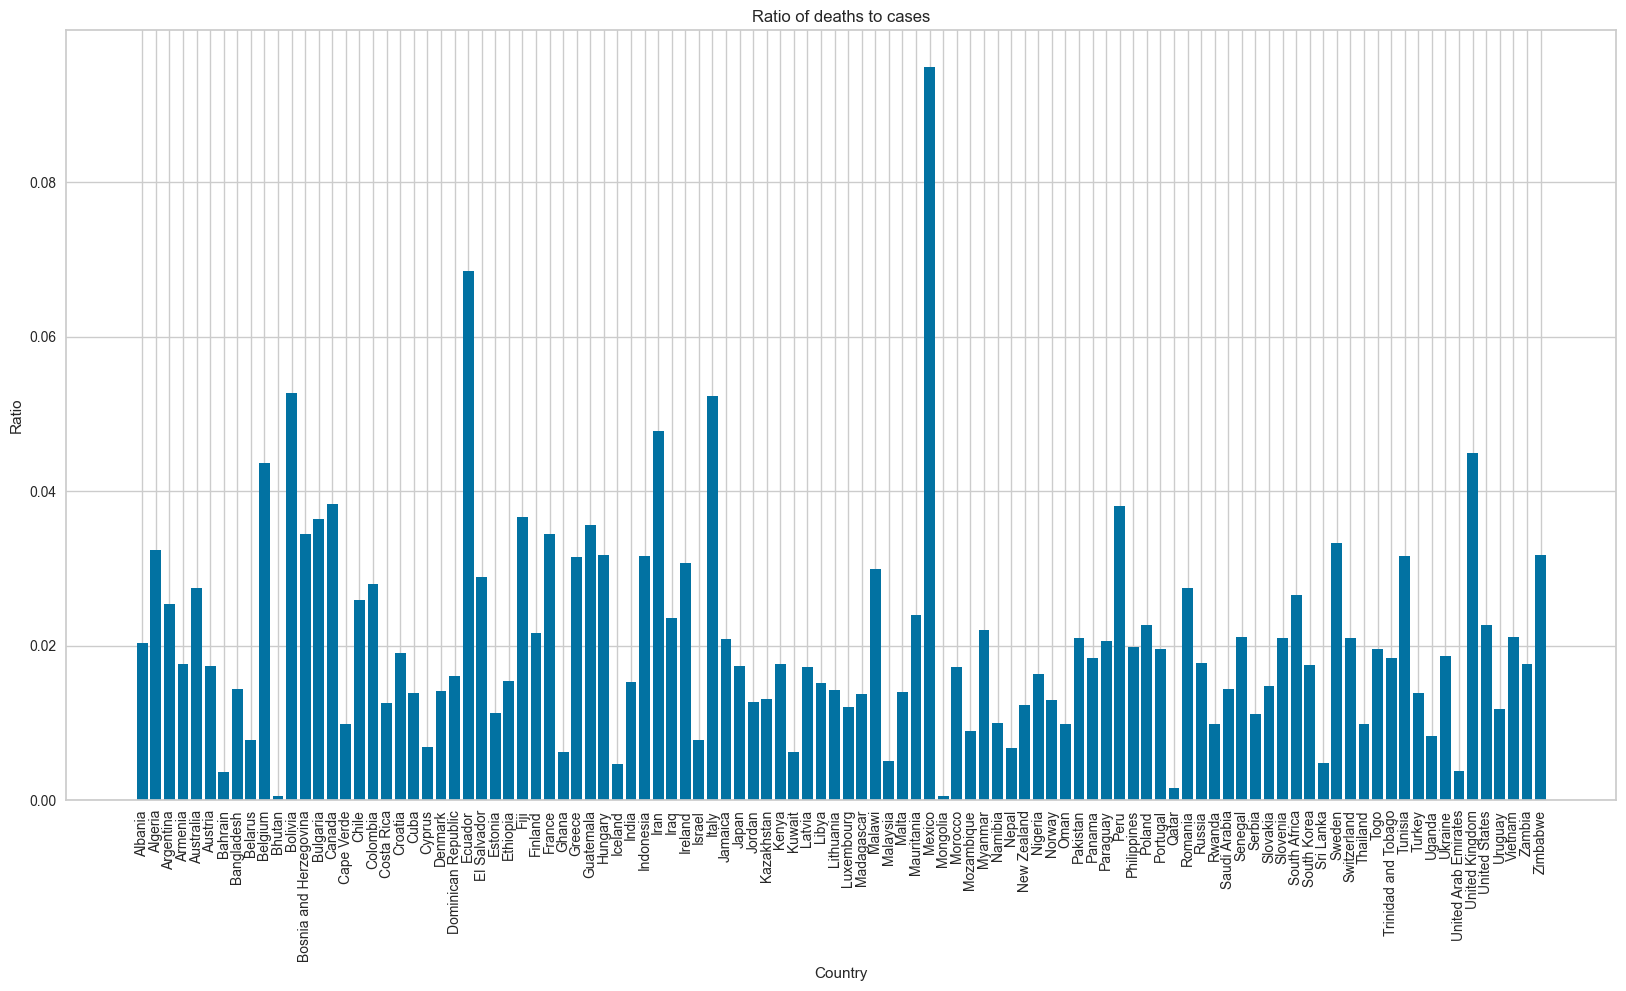

In [25]:
# Plot the ratio of deaths to cases for each country
plt.figure(figsize=(20,10))
plt.title('Ratio of deaths to cases')
plt.ylabel('Ratio')
plt.xlabel('Country')
plt.xticks(rotation=90)
plt.bar(total_deaths_by_country.index, total_deaths_by_country.values / total_cases_by_country.values)
plt.show()

##### Deaths and Cases over time per country (normalized by population)

In [26]:
# Sort the countries by the total number of deaths and cases
countries_sorted_by_deaths = total_deaths_by_country.sort_values(ascending=False).index
countries_sorted_by_cases = total_cases_by_country.sort_values(ascending=False).index

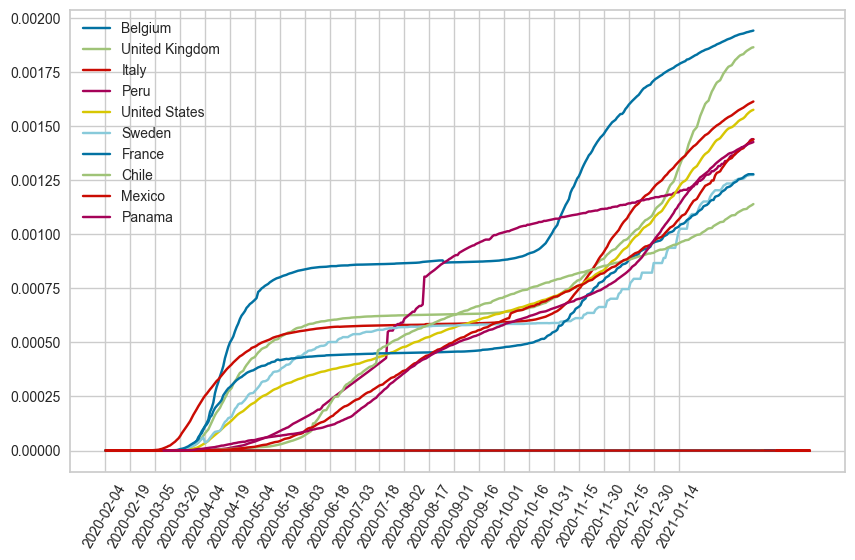

In [27]:

# Visualize deaths over time per country, normalized by population, for the 10 countries with the most deaths
plt.figure(figsize=(10,6))
for country in countries_sorted_by_deaths[0:10]:
    country_data = dataset[dataset['Entity'] == country]
    plt.plot(country_data['Date'], country_data['Deaths']/country_data['Population'], label=country)
    n = 15  # Display every nth label
    plt.xticks(range(0, len(country_data['Deaths']), n), rotation=60)
plt.legend()
plt.show()


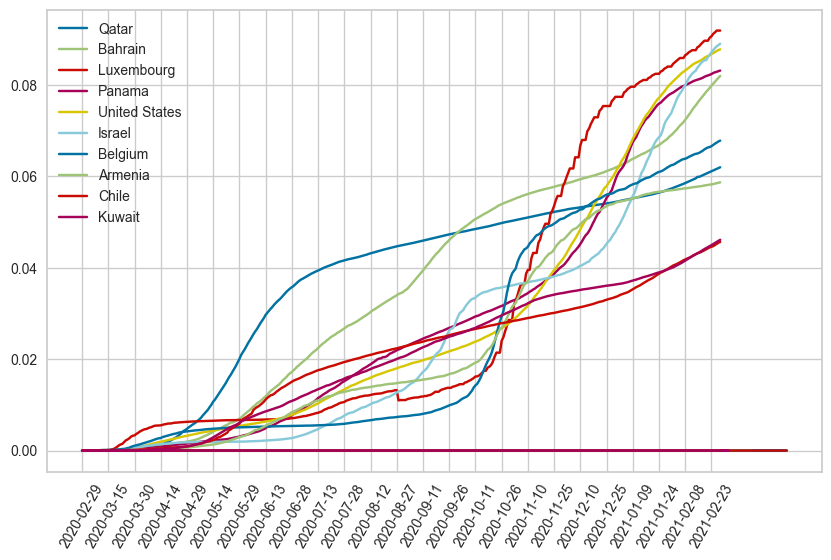

In [28]:
# Visualize cases over time per country, normalized by population, for the 10 countries with the most cases
plt.figure(figsize=(10,6))
for country in countries_sorted_by_cases[0:10]:
    country_data = dataset[dataset['Entity'] == country]
    plt.plot(country_data['Date'], country_data['Cases']/country_data['Population'], label=country)
    n = 15  # Display every nth label
    plt.xticks(range(0, len(country_data['Cases']), n), rotation=60)
plt.legend()
plt.show()


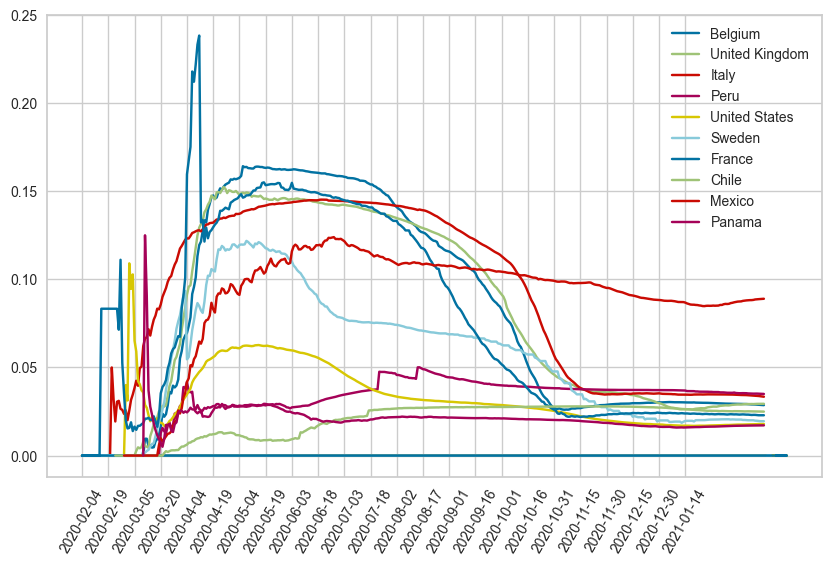

In [29]:
plt.figure(figsize=(10,6))
for country in countries_sorted_by_deaths[0:10]:
    country_data = dataset[dataset['Entity'] == country]
    plt.plot(country_data['Date'], country_data['Deaths']/country_data['Cases'], label=country)
    n = 15  # Display every nth label
    plt.xticks(range(0, len(country_data['Cases']), n), rotation=60)
plt.legend()
plt.show()

##### Pairplot
We ll further explore some data that seemed interesting, using some pairplots

In [30]:
# Create a copy of dataset with renamed columns for improved readability
dataset_renamed = dataset.rename(columns={
    'Hospital beds per 1000 people': 'Hospitals',
    'Medical doctors per 1000 people': 'Doctors',
})

In [31]:
# Columns for pairplot
selected_columns_1 = ['Cases', 'Deaths', 'Daily tests', 'GDP/Capita']
selected_columns_2 = ['Cases', 'Deaths', 'Doctors', 'Hospitals']

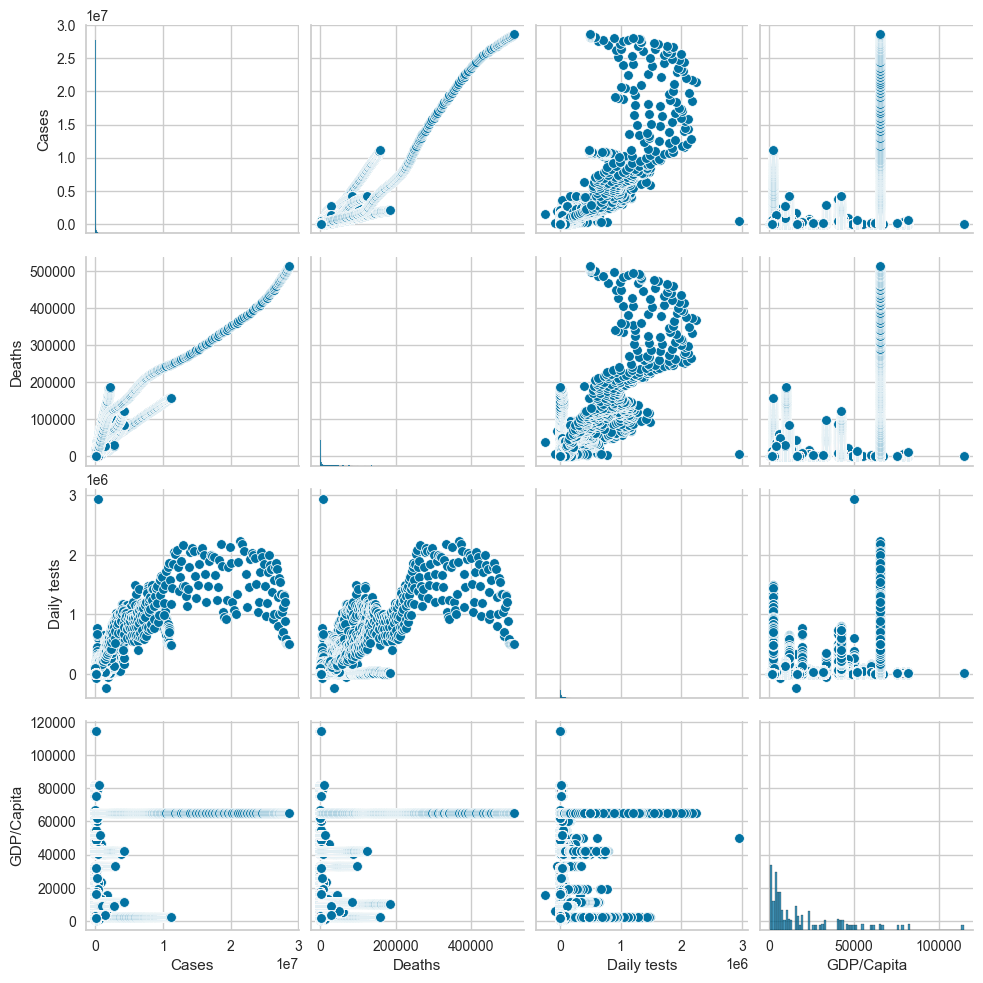

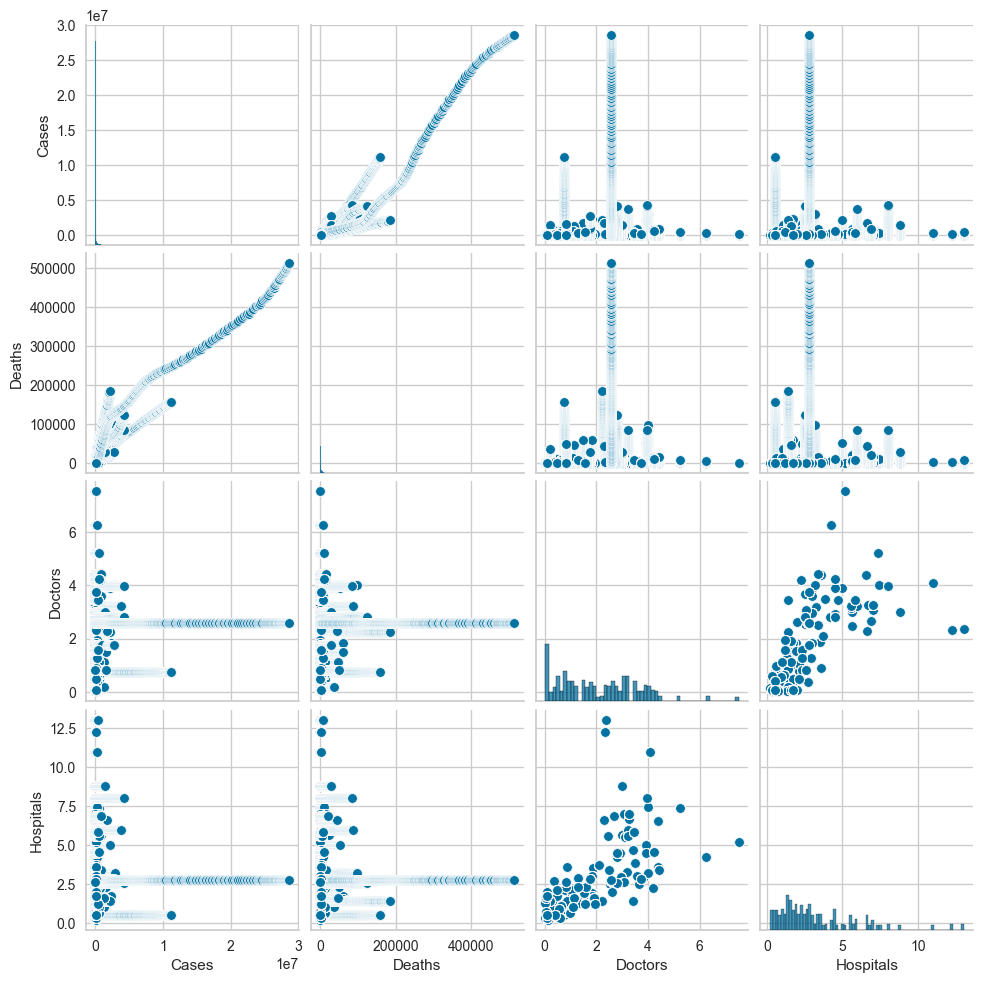

In [32]:
# Pairplot
sns.pairplot(dataset_renamed[selected_columns_1])
plt.show()

sns.pairplot(dataset_renamed[selected_columns_2])
plt.show()

## 2. Clustering

We will start by adding features that interest us into the dataframe. For example :
- Positive Test ratio
- Death to Cases ratio
- Total Cases to Population ratio
- Total Deaths to Population ratio
- Daily tests to Population ratio


Note that we ll try to cluster the countries of the dataset two times. 
- by using the raw data
- by using a scaled version of the data

In [33]:
# Group by country and calculate the sum of Cases, Deaths and Daily tests
country_features = dataset.groupby('Entity').agg({'Cases': 'sum', 'Deaths': 'sum', 'Daily tests': 'sum', 'Population': 'first', 
                                        'GDP/Capita': 'first', 'Hospital beds per 1000 people': 'first', 'Medical doctors per 1000 people': 'first'}).reset_index()

# Creating an array of the features that we ll use for clustering
features = ['Cases per Capita', 'Deaths per Capita', 'Tests per Capita', 'Positivity Rate', 'Death Rate']

# Getting daily cases by subtracting the previous day's cases from the current day's cases
country_features['Daily cases'] = country_features['Cases'].diff()

# Preprocessing: create the features we're interested in
country_features['Cases per Capita'] = country_features['Cases'] / country_features['Population']
country_features['Deaths per Capita'] = country_features['Deaths'] / country_features['Population']
country_features['Tests per Capita'] = country_features['Daily tests'] / country_features['Population']
country_features['Positivity Rate'] = country_features['Daily cases'] / country_features['Daily tests']
country_features['Death Rate'] = country_features['Deaths'] / country_features['Cases']


# Fill the missing values with 0 (the first day's positivity rate is NaN because there were no tests done the day before)
country_features = country_features.fillna(0)

Remember : We filled some empty values with 0. This will result in some features having a value of infinity. We have to protect our data from that

In [34]:
# Changing infinity values to 0, since they are caused by 0 daily tests
country_features = country_features.replace([np.inf, -np.inf], 0)

### Determining the best k for the KMeans algorithm
We will use the elbow method.

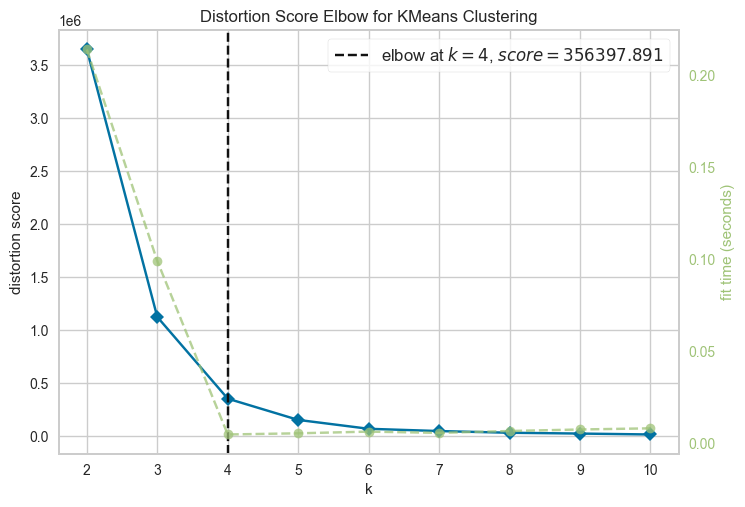

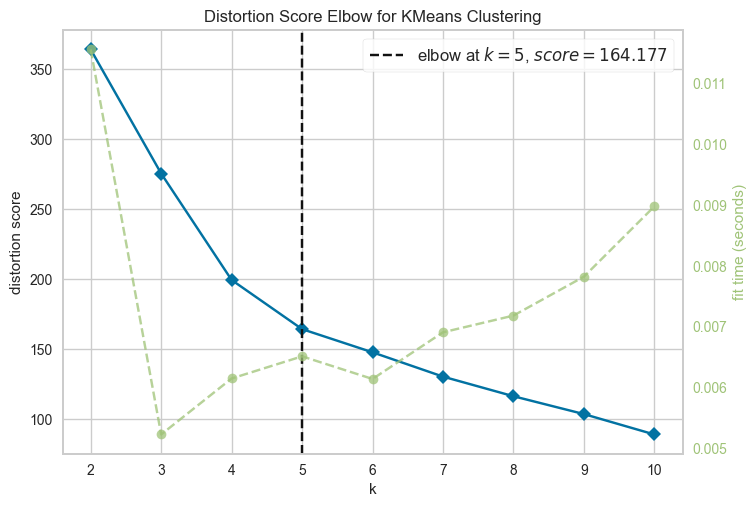

<AxesSubplot: title={'center': 'Distortion Score Elbow for KMeans Clustering'}, xlabel='k', ylabel='distortion score'>

In [35]:
# Determining the best k for the k-means algorithm using the elbow method
kmeans = KMeans(n_init=10)
elbow = KElbowVisualizer(kmeans,numeric_only=None)
elbow.fit(country_features[features])
elbow.show()

# Determining the best k for the k-means algorithm using the elbow method (using a scaled dataset)
scaler = StandardScaler()
country_features_scaled = scaler.fit_transform(country_features[features])
kmeans = KMeans(n_init=10)
elbow_scaled = KElbowVisualizer(kmeans,numeric_only=None)
elbow_scaled.fit(country_features_scaled)
elbow_scaled.show()

#### Clustering the Countries using the raw data

In [36]:
# We run KMeans with optimal k=4 and then add the cluster labels to the dataframe
kmeans = KMeans(n_clusters=5, n_init=10)
kmeans.fit(country_features[features])
country_features['Cluster'] = kmeans.labels_




#Presenting the clusters
print("----------------Cluster 0----------------------")
# print(country_features[country_features['Cluster'] == 0]['Entity'])
print("Cluster 0 contains",country_features[country_features['Cluster'] == 0]['Entity'].count(),"countries")

print("----------------Cluster 1----------------------")
# print(country_features[country_features['Cluster'] == 1]['Entity'])
print("Cluster 1 contains",country_features[country_features['Cluster'] == 1]['Entity'].count(),"countries")

print("----------------Cluster 2----------------------")
# print(country_features[country_features['Cluster'] == 2]['Entity'])
print("Cluster 2 contains",country_features[country_features['Cluster'] == 2]['Entity'].count(),"countries")

print("----------------Cluster 3----------------------")
# print(country_features[country_features['Cluster'] == 3]['Entity'])
print("Cluster 3 contains",country_features[country_features['Cluster'] == 3]['Entity'].count(),"countries")

print("----------------Cluster 4----------------------")
# print(country_features[country_features['Cluster'] == 4]['Entity'])
print("Cluster 4 contains",country_features[country_features['Cluster'] == 4]['Entity'].count(),"countries")


----------------Cluster 0----------------------
Cluster 0 contains 89 countries
----------------Cluster 1----------------------
Cluster 1 contains 1 countries
----------------Cluster 2----------------------
Cluster 2 contains 4 countries
----------------Cluster 3----------------------
Cluster 3 contains 1 countries
----------------Cluster 4----------------------
Cluster 4 contains 9 countries


        Cases per Capita           Deaths per Capita            \
                    mean       std              mean       std   
Cluster                                                          
0               3.387263  3.035086          0.072911  0.076459   
1               0.898579       NaN          0.010650       NaN   
2               2.281454  2.624873          0.026224  0.031667   
3               0.736994       NaN          0.015333       NaN   
4               1.479854  2.773562          0.020823  0.047440   

        Tests per Capita           Positivity Rate             Death Rate  \
                    mean       std            mean         std       mean   
Cluster                                                                     
0               0.509272  0.720639        0.990702   18.857798   0.022196   
1               0.294861       NaN    -3164.437144         NaN   0.011852   
2               0.114796  0.079034     -579.983200  137.547288   0.017242   
3        

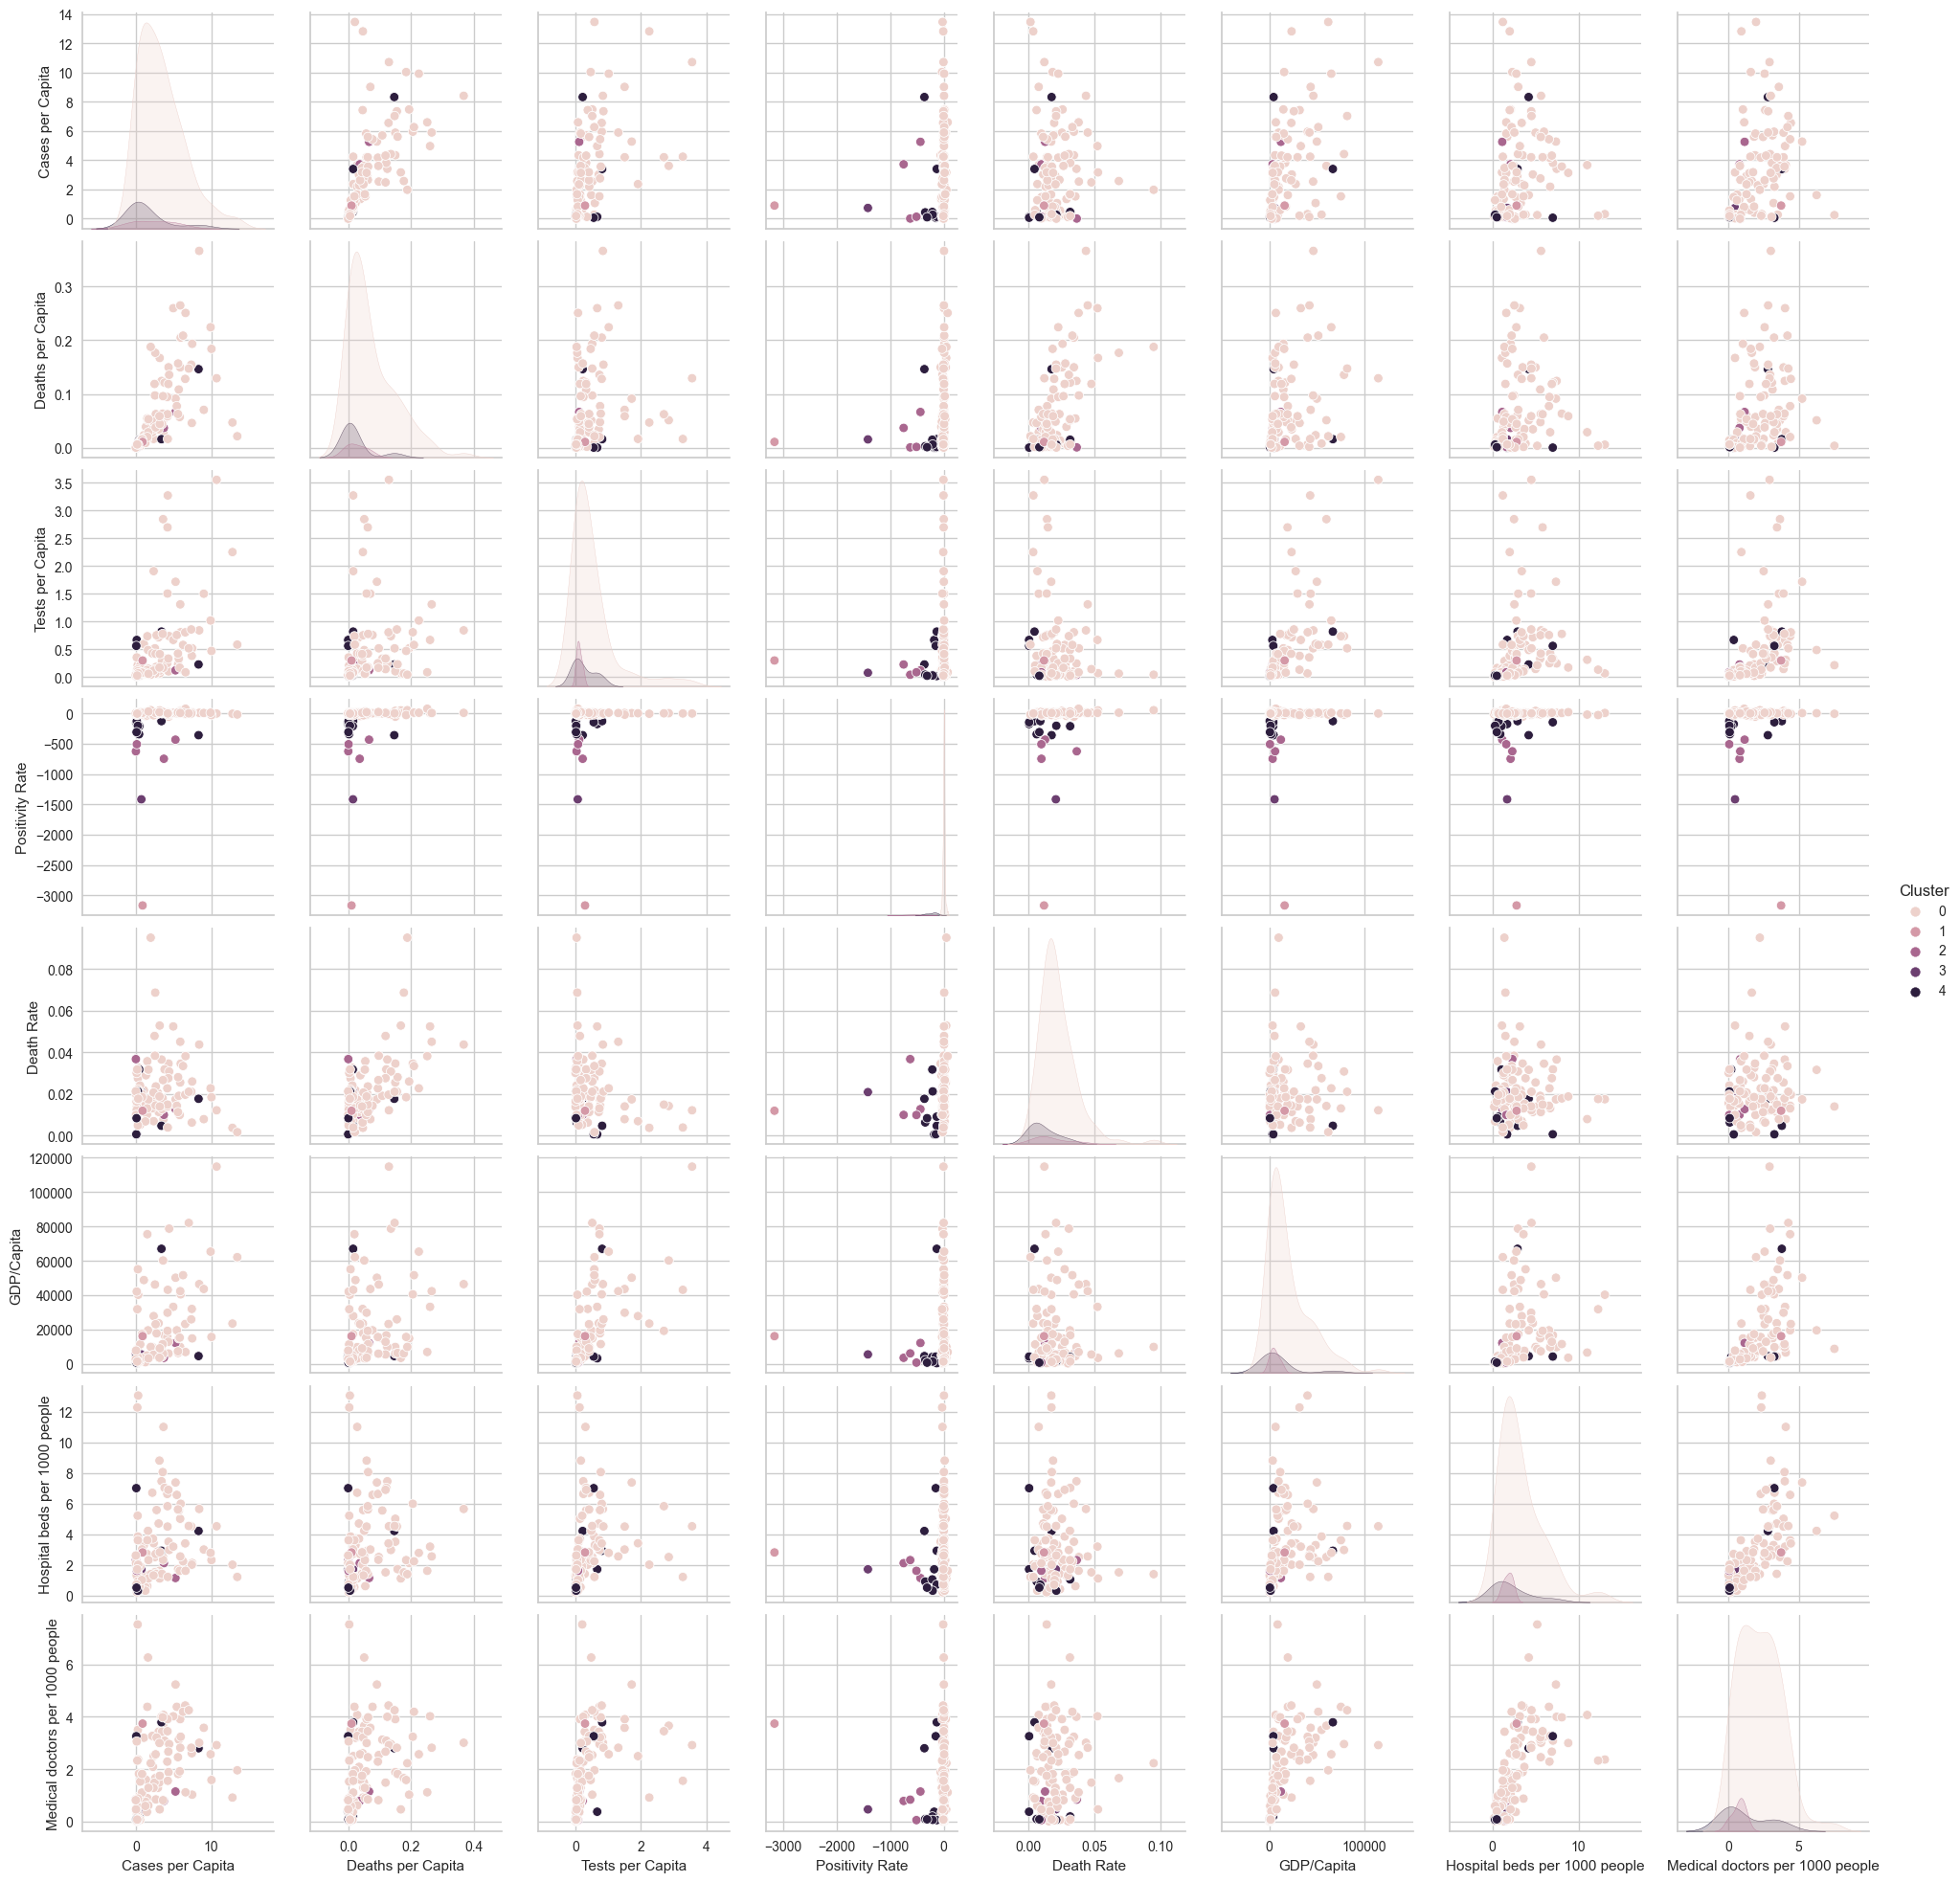

In [37]:
# Getting some statistics about the clusters
print(country_features.groupby('Cluster').agg({'Cases per Capita': ['mean', 'std'], 'Deaths per Capita': ['mean', 'std'], 'Tests per Capita': ['mean', 'std'], 'Positivity Rate': ['mean', 'std'], 'Death Rate': ['mean', 'std']}))

# Visualize the clusters
sns.pairplot(country_features, hue='Cluster', vars=['Cases per Capita', 'Deaths per Capita', 'Tests per Capita', 'Positivity Rate', 'Death Rate', 'GDP/Capita', 'Hospital beds per 1000 people', 'Medical doctors per 1000 people'])


#### Clustering the Countries using the scaled data

In [38]:
# We run KMeans with optimal k=4 and then add the cluster labels to the dataframe (using a scaled dataset)
kmeans_scaled = KMeans(n_clusters=5, n_init=10)
kmeans_scaled.fit(country_features_scaled)
country_features_scaled = country_features.copy()
country_features_scaled['Cluster'] = kmeans_scaled.labels_


#Presenting the scaled clusters
print("----------------Cluster 0----------------------")
# print(country_features_scaled[country_features_scaled['Cluster'] == 0]['Entity'])
print("Cluster 0 contains",country_features_scaled[country_features_scaled['Cluster'] == 0]['Entity'].count(),"countries")

print("----------------Cluster 1----------------------")
# print(country_features_scaled[country_features_scaled['Cluster'] == 1]['Entity'])
print("Cluster 1 contains",country_features_scaled[country_features_scaled['Cluster'] == 1]['Entity'].count(),"countries")

print("----------------Cluster 2----------------------")
# print(country_features_scaled[country_features_scaled['Cluster'] == 2]['Entity'])
print("Cluster 2 contains",country_features_scaled[country_features_scaled['Cluster'] == 2]['Entity'].count(),"countries")

print("----------------Cluster 3----------------------")
# print(country_features_scaled[country_features_scaled['Cluster'] == 3]['Entity'])
print("Cluster 3 contains",country_features_scaled[country_features_scaled['Cluster'] == 3]['Entity'].count(),"countries")

print("----------------Cluster 4----------------------")
# print(country_features_scaled[country_features_scaled['Cluster'] == 3]['Entity'])
print("Cluster 4 contains",country_features_scaled[country_features_scaled['Cluster'] == 4]['Entity'].count(),"countries")

----------------Cluster 0----------------------
Cluster 0 contains 58 countries
----------------Cluster 1----------------------
Cluster 1 contains 27 countries
----------------Cluster 2----------------------
Cluster 2 contains 9 countries
----------------Cluster 3----------------------
Cluster 3 contains 2 countries
----------------Cluster 4----------------------
Cluster 4 contains 8 countries


        Cases per Capita           Deaths per Capita            \
                    mean       std              mean       std   
Cluster                                                          
0               1.176409  1.188004          0.019121  0.019477   
1               6.044281  2.382498          0.123616  0.053173   
2               6.269593  3.638021          0.060215  0.035339   
3               0.817787  0.114258          0.012992  0.003312   
4               4.507155  2.319305          0.224100  0.077387   

        Tests per Capita           Positivity Rate              Death Rate  \
                    mean       std            mean          std       mean   
Cluster                                                                      
0               0.196973  0.226805      -63.329137   155.750223   0.017216   
1               0.455925  0.262226      -27.893870   108.697270   0.022521   
2               2.360318  0.767735       -3.602071     8.453262   0.010486   
3  

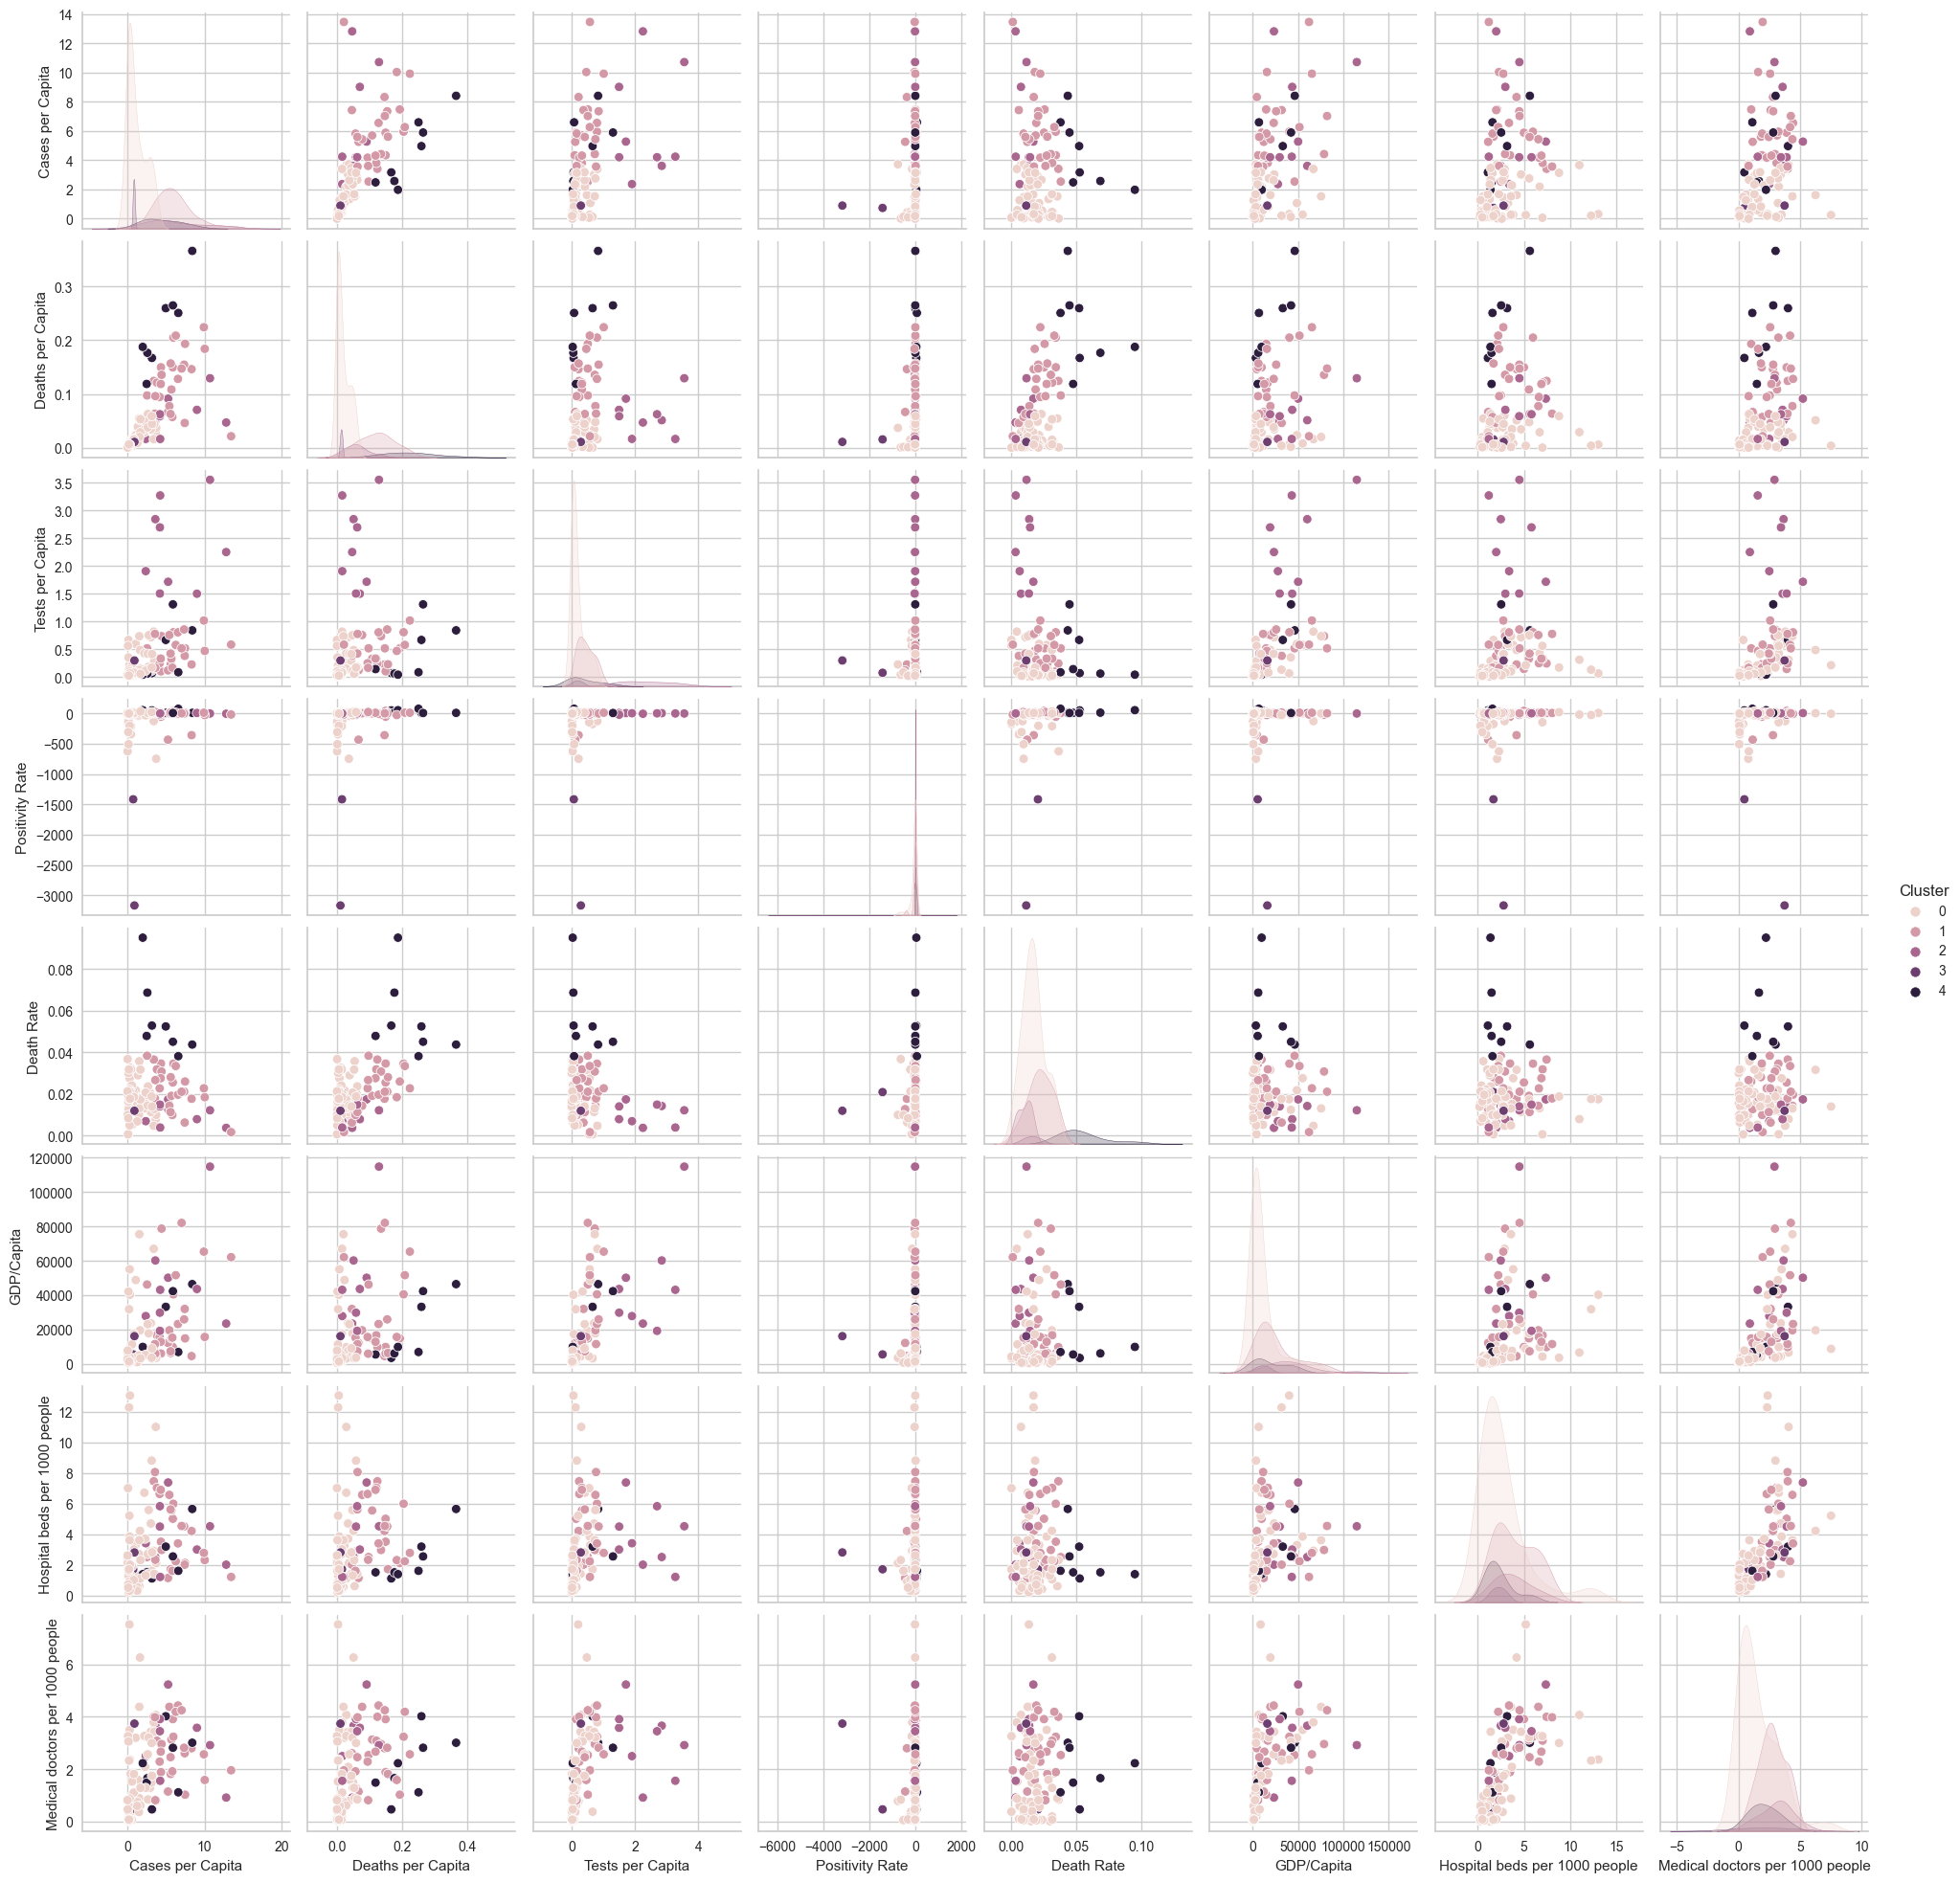

In [39]:
# Getting some statistics about the clusters
print(country_features_scaled.groupby('Cluster').agg({'Cases per Capita': ['mean', 'std'], 'Deaths per Capita': ['mean', 'std'], 'Tests per Capita': ['mean', 'std'], 'Positivity Rate': ['mean', 'std'], 'Death Rate': ['mean', 'std'], 'GDP/Capita': ['mean', 'std'], 'Hospital beds per 1000 people': ['mean', 'std'], 'Medical doctors per 1000 people': ['mean', 'std']}))

# Visualize the clusters
sns.pairplot(country_features_scaled, hue='Cluster', vars=['Cases per Capita', 'Deaths per Capita', 'Tests per Capita', 'Positivity Rate', 'Death Rate', 'GDP/Capita', 'Hospital beds per 1000 people', 'Medical doctors per 1000 people'])

# Export the clusters to a csv file
country_features_scaled.to_csv('exports/clusters.csv', index=False)

#### Trying to interpret the Clustering Results

In [40]:
# Select features and display top and bottom countries for each feature
features = ['Cases per Capita', 'Deaths per Capita', 'Tests per Capita', 'Positivity Rate', 'Death Rate', 'GDP/Capita', 'Hospital beds per 1000 people', 'Medical doctors per 1000 people']
for feature in features:
    sorted_countries = country_features.sort_values(by=feature, ascending=False)
    print(f"\n\n____Category: {feature}____")
    print("Top 3 Countries:")
    print(sorted_countries[['Entity', feature, 'Cluster']].head(3))
    
    print("Bottom 3 Countries:")
    print(sorted_countries[['Entity', feature, 'Cluster']].tail(3))



____Category: Cases per Capita____
Top 3 Countries:
        Entity  Cases per Capita  Cluster
76       Qatar         13.448664        0
6      Bahrain         12.808288        0
52  Luxembourg         10.705912        0
Bottom 3 Countries:
       Entity  Cases per Capita  Cluster
90   Thailand          0.029464        0
28       Fiji          0.012022        2
101   Vietnam          0.003446        0


____Category: Deaths per Capita____
Top 3 Countries:
            Entity  Deaths per Capita  Cluster
9          Belgium           0.366624        0
98  United Kingdom           0.265057        0
42           Italy           0.259883        0
Bottom 3 Countries:
       Entity  Deaths per Capita  Cluster
101   Vietnam           0.000073        0
10     Bhutan           0.000064        4
59   Mongolia           0.000037        4


____Category: Tests per Capita____
Top 3 Countries:
                  Entity  Tests per Capita  Cluster
52            Luxembourg          3.554257        0
97  U

## 3. Predictors

We willl now create a predictor of the Positivity Rate in Greece. Our model has to predict the Positivity rate three days ahead of the date it's used.
We will then evaluate our model using metrics such us the Mean Squared Error.

In [41]:
# Isolating data from Greece and reseting the index
Greece = dataset[dataset['Entity'] == 'Greece']
Greece = Greece.reset_index(drop=True)

Greece.head()

,Entity,Continent,Latitude,Longitude,Average temperature per year,Hospital beds per 1000 people,Medical doctors per 1000 people,GDP/Capita,Population,Median age,Population aged 65 and over (%),Date,Daily tests,Cases,Deaths
0,Greece,Europe,39.07,21.82,17,4.21,6.26,19582.5,10760421,45,22,2020-02-26,0,1,0
1,Greece,Europe,39.07,21.82,17,4.21,6.26,19582.5,10760421,45,22,2020-02-27,0,3,0
2,Greece,Europe,39.07,21.82,17,4.21,6.26,19582.5,10760421,45,22,2020-02-28,0,4,0
3,Greece,Europe,39.07,21.82,17,4.21,6.26,19582.5,10760421,45,22,2020-02-29,0,4,0
4,Greece,Europe,39.07,21.82,17,4.21,6.26,19582.5,10760421,45,22,2020-03-01,0,7,0


In [42]:
# Getting the number of daily cases by subtracting the previous day's cases from the current day's cases
Greece['Daily Cases'] = Greece['Cases'].diff()

# Adding a column with the Positivity Rate
Greece['Positivity Rate'] = Greece['Daily Cases'] / Greece['Daily tests']

# Filling the missing values with 0 (the first day's positivity rate is NaN because there were no tests done the day before)
Greece = Greece.fillna(0)

# Changing infinity values to 0, since they are caused by 0 daily tests
Greece = Greece.replace([np.inf, -np.inf], 0)

# Exporting the data of Greece to a csv file
Greece.to_csv('exports/Greece.csv', index=False)

Greece.head()

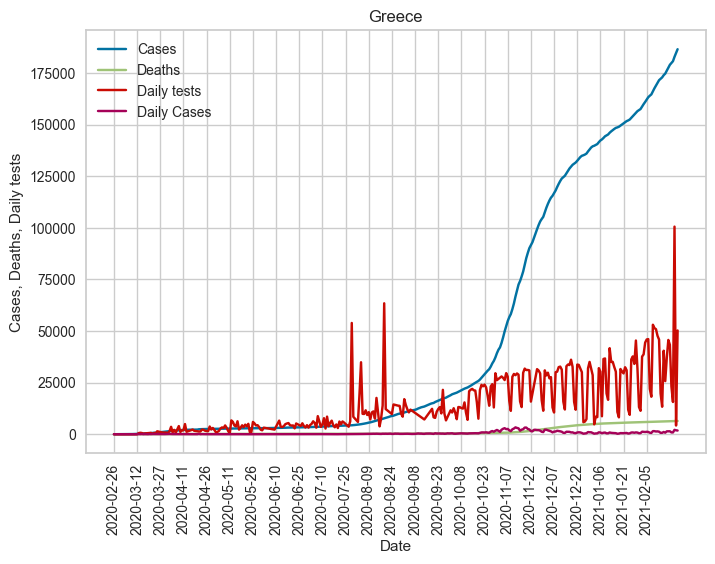

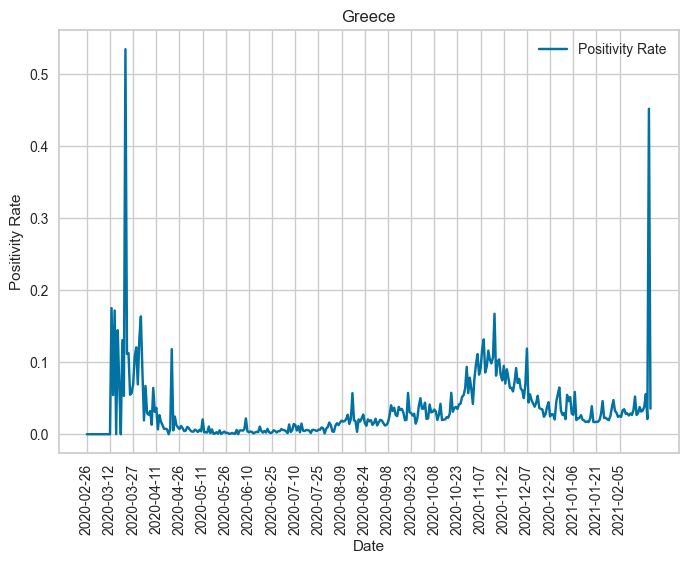

In [51]:
# Plotting the data of Greece (Cases, Deaths, Daily Cases, Daily tests) over time on the same graph 
plt.figure()
plt.title('Greece')
plt.ylabel('Cases, Deaths, Daily tests')
plt.xlabel('Date')
n = 15  # Display every nth label
plt.xticks(range(0, len(country_data['Deaths']), n), rotation=90)
plt.plot(Greece['Date'], Greece['Cases'], label='Cases')
plt.plot(Greece['Date'], Greece['Deaths'], label='Deaths')
plt.plot(Greece['Date'], Greece['Daily tests'], label='Daily tests')
plt.plot(Greece['Date'], Greece['Daily Cases'], label='Daily Cases')
plt.legend()
plt.show()

# Plottin the Positivity Rate of Greece over time
plt.figure()
plt.title('Greece')
plt.ylabel('Positivity Rate')
plt.xlabel('Date')
n = 15  # Display every nth label
plt.xticks(range(0, len(country_data['Deaths']), n), rotation=90)
plt.plot(Greece['Date'], Greece['Positivity Rate'], label='Positivity Rate')
plt.legend()
plt.show()


In [44]:
# Creating a new column with the Positivity Rate three days ahead
Greece['Positivity Rate 3 days ahead'] = Greece['Positivity Rate'].shift(-3)

# Removing the NaN values that were created by the shift
Greece = Greece.dropna()

Greece.head(15)


,Entity,Continent,Latitude,Longitude,Average temperature per year,Hospital beds per 1000 people,Medical doctors per 1000 people,GDP/Capita,Population,Median age,Population aged 65 and over (%),Date,Daily tests,Cases,Deaths,Daily Cases,Positivity Rate,Positivity Rate 3 days ahead
0,Greece,Europe,39.07,21.82,17,4.21,6.26,19582.5,10760421,45,22,2020-02-26,0,1,0,0.0,0.0,0.000000
1,Greece,Europe,39.07,21.82,17,4.21,6.26,19582.5,10760421,45,22,2020-02-27,0,3,0,2.0,0.0,0.000000
2,Greece,Europe,39.07,21.82,17,4.21,6.26,19582.5,10760421,45,22,2020-02-28,0,4,0,1.0,0.0,0.000000
3,Greece,Europe,39.07,21.82,17,4.21,6.26,19582.5,10760421,45,22,2020-02-29,0,4,0,0.0,0.0,0.000000
4,Greece,Europe,39.07,21.82,17,4.21,6.26,19582.5,10760421,45,22,2020-03-01,0,7,0,3.0,0.0,0.000000
5,Greece,Europe,39.07,21.82,17,4.21,6.26,19582.5,10760421,45,22,2020-03-02,0,7,0,0.0,0.0,0.000000
6,Greece,Europe,39.07,21.82,17,4.21,6.26,19582.5,10760421,45,22,2020-03-03,0,7,0,0.0,0.0,0.000000
7,Greece,Europe,39.07,21.82,17,4.21,6.26,19582.5,10760421,45,22,2020-03-04,0,9,0,2.0,0.0,0.000000
8,Greece,Europe,39.07,21.82,17,4.21,6.26,19582.5,10760421,45,22,2020-03-05,0,31,0,22.0,0.0,0.000000
9,Greece,Europe,39.07,21.82,17,4.21,6.26,19582.5,10760421,45,22,2020-03-06,0,45,0,14.0,0.0,0.000000


In [45]:
# Splitting the data into features and target
features = Greece.drop(['Positivity Rate 3 days ahead', 'Entity','Continent'], axis=1)
target = Greece['Positivity Rate 3 days ahead']

# Splitting the data at the date 2021-01-01
split_date = '2021-01-01'
features_train = features[features['Date'] < split_date]
features_test = features[features['Date'] >= split_date]
target_train = target[features['Date'] < split_date]
target_test = target[features['Date'] >= split_date]

# Dropping the Date column
features_train = features_train.drop(['Date'], axis=1)
features_test = features_test.drop(['Date'], axis=1)

### SVM Model

In [46]:
# Scaling the features
scaler = StandardScaler()
features_train_scaled = scaler.fit_transform(features_train)
features_test_scaled = scaler.transform(features_test)

# Create the SVM model
svm_regressor = svm.SVR()
svm_regressor.fit(features_train_scaled, target_train)

# Evaluate the SVM model
svm_predictions = svm_regressor.predict(features_test_scaled)
print('SVM MSE:', mean_squared_error(target_test, svm_predictions))

SVM MSE: 0.0071780172699812345


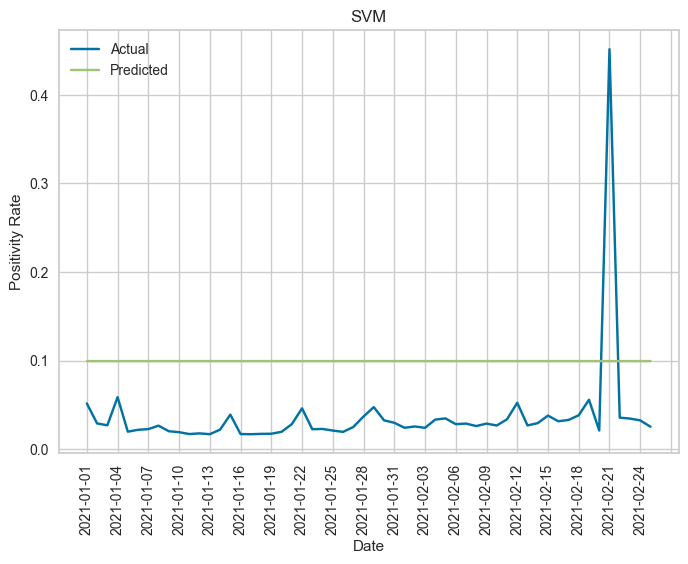

In [47]:
# Plot the SVM predictions next to the actual values
plt.figure()
plt.title('SVM')
plt.ylabel('Positivity Rate')
plt.xlabel('Date')
n = 3  # Display every nth label
plt.xticks(range(0, len(country_data['Deaths']), n), rotation=90)
plt.plot(features[features['Date'] >= split_date]['Date'], target_test, label='Actual')
plt.plot(features[features['Date'] >= split_date]['Date'], svm_predictions, label='Predicted')
plt.legend()
plt.show()

### RNN Model

In [48]:
# We will use the MinMax Scaler for the RNN model. RNNS are sensitive to the scale of the input data, so we need to scale the data to be between 0 and 1.
scaler = MinMaxScaler(feature_range=(0, 1))
features_train_scaled = scaler.fit_transform(features_train)
features_test_scaled = scaler.fit_transform(features_test)
target_test_scaled = scaler.fit_transform(target_test.array.reshape(-1, 1))
target_train_scaled = scaler.fit_transform(target_train.array.reshape(-1, 1))

# For RNN, we need to reshape input to be [samples, time steps, features]
features_train_scaled = np.reshape(features_train_scaled, (features_train_scaled.shape[0], 1, features_train_scaled.shape[1]))
features_test_scaled = np.reshape(features_test_scaled, (features_test_scaled.shape[0], 1, features_test_scaled.shape[1]))

In [49]:
# Create the RNN model
rnn_model = Sequential()
rnn_model.add(SimpleRNN(4, input_shape=(1, len(features_train.columns))))
rnn_model.add(Dense(1))
rnn_model.compile(loss='mean_squared_error', optimizer='adam')
rnn_model.fit(features_train_scaled, target_train_scaled, epochs=100, batch_size=1, verbose=2)

# Evaluate the RNN model
rnn_predictions = rnn_model.predict(features_test_scaled)
rnn_predictions = scaler.inverse_transform(rnn_predictions)
rnn_predictions = rnn_predictions.clip(min=0)
print('RNN MSE:', mean_squared_error(target_test, rnn_predictions))

Epoch 1/100
310/310 - 0s - loss: 0.0555 - 372ms/epoch - 1ms/step
Epoch 2/100
310/310 - 0s - loss: 0.0143 - 110ms/epoch - 356us/step
Epoch 3/100
310/310 - 0s - loss: 0.0097 - 110ms/epoch - 355us/step
Epoch 4/100
310/310 - 0s - loss: 0.0085 - 110ms/epoch - 356us/step
Epoch 5/100
310/310 - 0s - loss: 0.0076 - 102ms/epoch - 330us/step
Epoch 6/100
310/310 - 0s - loss: 0.0071 - 108ms/epoch - 347us/step
Epoch 7/100
310/310 - 0s - loss: 0.0066 - 114ms/epoch - 369us/step
Epoch 8/100
310/310 - 0s - loss: 0.0065 - 122ms/epoch - 395us/step
Epoch 9/100
310/310 - 0s - loss: 0.0063 - 119ms/epoch - 385us/step
Epoch 10/100
310/310 - 0s - loss: 0.0060 - 116ms/epoch - 376us/step
Epoch 11/100
310/310 - 0s - loss: 0.0060 - 117ms/epoch - 377us/step
Epoch 12/100
310/310 - 0s - loss: 0.0059 - 112ms/epoch - 360us/step
Epoch 13/100
310/310 - 0s - loss: 0.0058 - 114ms/epoch - 367us/step
Epoch 14/100
310/310 - 0s - loss: 0.0058 - 122ms/epoch - 394us/step
Epoch 15/100
310/310 - 0s - loss: 0.0057 - 123ms/epoch - 39

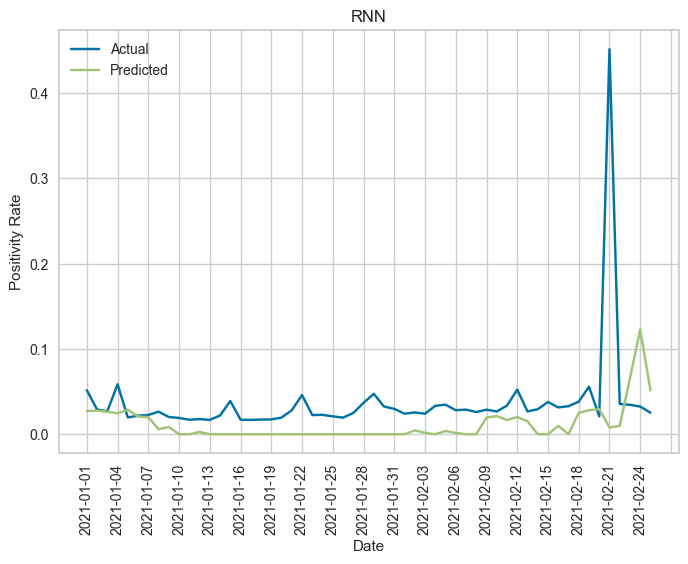

In [50]:
# Plot the RNN predictions next to the actual values
plt.figure()
plt.title('RNN')
plt.ylabel('Positivity Rate')
plt.xlabel('Date')
n = 3  # Display every nth label
plt.xticks(range(0, len(country_data['Deaths']), n), rotation=90)
plt.plot(features[features['Date'] >= split_date]['Date'], target_test, label='Actual')
plt.plot(features[features['Date'] >= split_date]['Date'], rnn_predictions, label='Predicted')
plt.legend()
plt.show()